# Advanced(ish) Topics in Differential Equations

---

## Motivation

In this notebook you'll find some additional concepts in calculus and differential equations that you may encounter later in the program. The first section should be more accessible to those with more limited calculus experience and provides techniques that have been used in NEU 314. The second section introduces somewhat more advanced topics that are useful for solving systems of differential equations or complex analysis of periodic data, such as LFP oscillations recorded from techniques like EEG or electrophysiology.

In addition to the calculus and differential equation textbooks listed in the previous lectures, I've also drawn from the following textbook I used in an applied math for engineering course:
- Kreyszig, Erwin. 2011. *Advanced Engineering Mathematics*, 10th Edition. Wiley 

This book covers a ton of topics from linear algebra, differential equations, complex analysis, optimization, and more; I generally wouldn't recommend it for a deep dive into any one topic, but it provides a decent overview of a lot of things.


## Table of contents
1. [Taylor Approximation](#TaylorA)
    1. [Taylor Polynomials](#TaylorP)
    2. [Taylor Series](#TaylorS)
2. [Fourier Analysis](#FourierA)
    1. [Fourier Polynomial](#FourierP)
    2. [Fourier Series](#FourierS)
    3. [Fourier Integrals](#FourierI)
    4. [Fourier Transforms](#FourierT)
    5. [Discrete Fourier Transforms & Fast Fourier Transforms](#FourierD)

In [1]:
# import some stuff
%matplotlib inline
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy.linalg as lin
from scipy.io import loadmat

---
## 1. Taylor Approximation<a name="TaylorA"></a>
A Taylor approximation is an example of a *function approximation*. Sometimes we want to examine the behavior of a dynamical system around some point of interest, for example a critical point. If the differential equation is difficult to integrate, we can use a function approximation that is easier to integrate to make an estimate of what that function looks like. *Taylor approximations* are one of the most widely used function approximations, which approximates the function of interest as a polynomial. Taylor approximations are useful for *local approximations*, i.e. they are only accurate around the point on which they are defined. 

### Taylor Polynomials<a name="TaylorP"></a>

Taylor approximations are defined by a function's corresponding *Taylor polynomial*, which is a sum of that function's derivatives around a specific point. Explicitly,

<div class="alert alert-block alert-info">
<b>Taylor Polynomial of Degree $n$ Approximating $f(x)$ for $x$ near $a$:</b> 
$$ f(x) \approx f(a) + f'(a)(x-a) + \frac{f''(a)}{2!}(x-a)^2 + ... + \frac{f^{(n)}(a)}{n!}(x-a)^n$$
</div>

The higher the degree $n$, the more accurate the approximation. 

The most basic of these approximations is the Taylor Polynomial of degree 1, which is a linear approximation that we've already seen via the *average rate of change* as an approximation to the derivarive. Recall the following:

$$\begin{matrix}\text{Average rate of change of } f \\ \text{ over the interval from } a \text{ to } a+h\end{matrix}  = \frac{f(a+h) - f(a)}{h}$$

If we define $x=a+h$, we can rewrite this as $f'(a) \approx \frac{f(x) - f(a)}{x-a}$, or:

$$f(x) \approx f(a) + f'(a)(x-a)$$

Which is the definition of the Taylor Polynomial of Degree 1:

<div class="alert alert-block alert-info">
<b>Taylor Polynomial of Degree 1 Approximating $f(x)$ for $x$ near $a$:</b> 
$$ f(x) \approx f(a) + f'(a)(x-a)$$
</div>

To visualize why this works as a *local* approximation, recall that the derivative of a function at some point is the slope of the line tangent to that point; the first degree Taylor polynomial, then, is the equation corresponding to that tangent line. Consider the function $f(x) = x^3$ and it's first degree Taylor approximation around $a = 2$.

(0.0, 40.0)

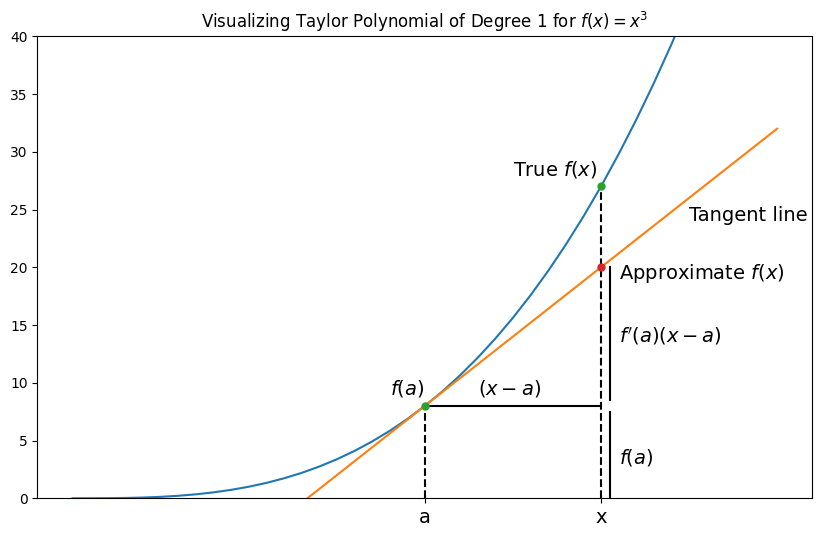

In [2]:
# define function f(x) = x^3
x = np.arange(0,4.1,0.1)
def f(x): return x**3

# define f'(x) = 3x^2
def df(x): return 3*x**2

# define taylor polynomial of degree 1 around a = 2
a = 2
def taylor_d1(x): return f(a) + df(a)*(x-a)

_, ax4 = plt.subplots(figsize=(10,6))
ax4.plot(x,f(x)) # original function
ax4.plot(x,taylor_d1(x)) # taylor polynomial of degree 1

ax4.plot([2,2],[0,f(2)],'k--') # f(a)
ax4.text(1.8,f(2)+1,r"$f(a)$",fontsize=14)

ax4.plot([3,3],[0,f(3)],'k--') # f(x)
ax4.text(2.5,f(3)+1,r"True $f(x)$",fontsize=14)

ax4.text(3.1,taylor_d1(3)-1,r"Approximate $f(x)$",fontsize=14)

ax4.plot([2,3],[f(2),f(2)],'k-') # (x-a)
ax4.text(2.3,f(2)+1,r"$(x-a)$",fontsize=14)

ax4.plot([3.05,3.05],[f(2)+0.5,taylor_d1(3)],'k-') # f'(a)(x-a)
ax4.text(3.1,13.5,r"$f'(a)(x-a)$",fontsize=14)

ax4.plot([3.05,3.05],[0,f(2)-0.5],'k-') # f(a)
ax4.text(3.1,3,r"$f(a)$",fontsize=14)

ax4.plot([2,3],[f(2),f(3)],'.',markersize=10)
ax4.plot(3,taylor_d1(3),'.',markersize=10)

ax4.text(3.5,taylor_d1(3)+4,r"Tangent line",fontsize=14)

ax4.set_title(r"Visualizing Taylor Polynomial of Degree 1 for $f(x) = x^3$")
ax4.set_xticks([2,3],['a','x'],fontsize=14)
ax4.set_ylim([0,40])


As visible above, points near $f(a)$, by which the tangent line is defined, align well to the true values of our original function $f(x)$. However, the further we stray from $x=a$, the larger the gap between the tangent line and the true value of $f(x)$.

Increasing the degree of the Taylor polynomial improves upon a purely linear approximation by adding in non-linearity.

(0.5, 3.5)

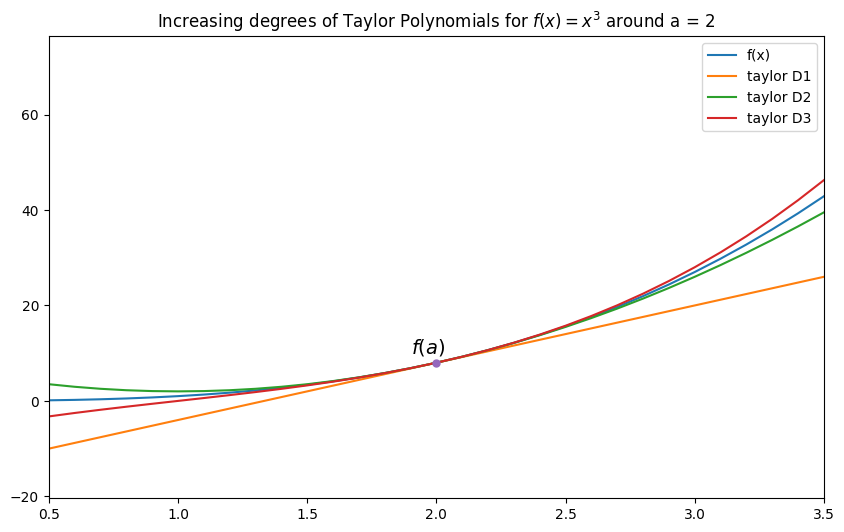

In [3]:
def ddf(x): return 6*x
def dddf(x): return 6


def taylor_d2(x): return f(a) + df(a)*(x-a) + ddf(a)*(x-a)**2/2
def taylor_d3(x): return f(a) + df(a)*(x-a) + ddf(a)*(x-a)**2/2 + dddf(a)*(x-a)**3/3


_, ax5 = plt.subplots(figsize=(10,6))
ax5.plot(x,f(x)) # original function
ax5.plot(x,taylor_d1(x)) # taylor polynomial of degree 1
ax5.plot(x,taylor_d2(x)) # taylor polynomial of degree 1
ax5.plot(x,taylor_d3(x)) # taylor polynomial of degree 1
ax5.plot(2,f(2),'.',markersize=10)
ax5.text(1.9,f(2)+2,r"$f(a)$",fontsize=14)
ax5.legend(['f(x)','taylor D1','taylor D2','taylor D3'])
ax5.set_title(r"Increasing degrees of Taylor Polynomials for $f(x)=x^3$ around a = 2")
ax5.set_xlim([0.5,3.5])



### Taylor Series<a name="TaylorS"></a>

The jump from a Taylor polynomial of degree $n$ to a Talor series is pretty straightforward: a Taylor Series expansion of some function is a Taylor polynomial that goes on forever, i.e. an infinite sum as the order $n$ goes to infinity.

<div class="alert alert-block alert-info">
<b>Taylor Series for $f(x)$ about $x=a$:</b> 
\begin{align*} f(x) &= f(a) + f'(a)(x-a) + \frac{f''(a)}{2!}(x-a)^2 + ... + \frac{f^{(n)}(a)}{n!}(x-a)^n + ... \\ &= f(a) + \sum_{n=1}^\infty \frac{f^{(n)}(a)}{n!}(x-a)^n\end{align*}
</div>


#### Deriving Euler's formula

Taylor series can be used to derive Euler's formula!

<div class="alert alert-block alert-info">
<b>Euler's formula:</b>
    $$ e^{it} = \cos(t) + i \sin(t) $$
</div>


---
## 2. Fourier Analysis<a name="FourierA"></a>

In this section we walk briefly through some basics of Fourier Analysis to work our way towards *Fast Fourier Transforms*, which is a numerical algorithm widely used in a variety of fields and applications. A couple applications in Neuroscience are spectral analysis of time series data (e.g. LFP, which we'll try out in the exercise) as well as using FFT-based convolution to accelerate clustering algorithms used for things like postural analysis or visualizing single-cell RNA-sequencing (e.g. FIt-SNE, Linderman et al., 2019). In almost all of the programming languages you'll encounter in the program (Python, MATLAB, julia), packages already exist to compute FFTs and related analyses, so the intention of the material here is *not* to get you up to speed on being able to code up an FFT algorithm yourself. Instead, the goal is to hopefully build an intuition of *how* this algorithm works without going *too* deep in the weeds, while providing enough detail to point you in the right direction if you care to delve deeper.

### Fourier Polynomials<a name="FourierP"></a>

As another type of function approximation, we can turn to Fourier polynomials if we want a *global* approximation of functions with periodicity. A Fourier polynomial can approximate periodic functions by expressing them in terms of simpler ones, namely, sines and cosines. For the sake of initial demonstration, we'll start by only considering functions of period $2\pi$. For anyone that benefits from explicit equations, the formula for a Fourier polynomial is listed below:

<div class="alert alert-block alert-info">
<b>Fourier Polynomial of Degree $n$:</b> A periodic function $f(x)$ with period $2\pi$ can be approximated by
$$ f(x) \approx a_0 + \sum_{n=1}^N \big(a_n \cos(nx) + b_n \sin(nx)\big)$$
with Fouier coeficients:
\begin{align}
    a_0 &= \frac{1}{2\pi}\int_{-\pi}^{\pi} f(x) dx \\
    a_n &= \frac{1}{\pi}\int_{-\pi}^{\pi} f(x) \cos(nx) dx \\
    b_n &= \frac{1}{\pi}\int_{-\pi}^{\pi} f(x) \sin(nx) dx
\end{align}
</div>

For anyone else, think of a Fourier polynomial as a bunch of sines and cosines of varying periods ($\frac{2\pi}{n}$) and amplitudes ($a_n,b_n$) being summed together to create a "messier", non-sinusoidal periodic shape. For example, consider a rectangular wave: 

\begin{equation*}
    f(x) \leftarrow 
    \begin{cases}
        -1, & \text{if $\frac{3\pi}{4} < x < \frac{7\pi}{4}$} \\
        1, & \text{otherwise}
    \end{cases}
\end{equation*}

A first degree Fourier polynomial, or a sum of one sine with period $2\pi$ and one cosine with period $2\pi$, would capture the *periodicity* and *offset* of the square wave, but the shape would remain sinusoidal and be a poor estimate of the corners.

> **NOTE:** You will **never** be expected to solve for the coefficients of and code up a Fourier series (or a Fourier integral) by hand. I'm only doing so below (and later in the lecture) for the purpose of visualization. I would not dwell on the details of the following `fourier` function (and the later `fourierint` function)

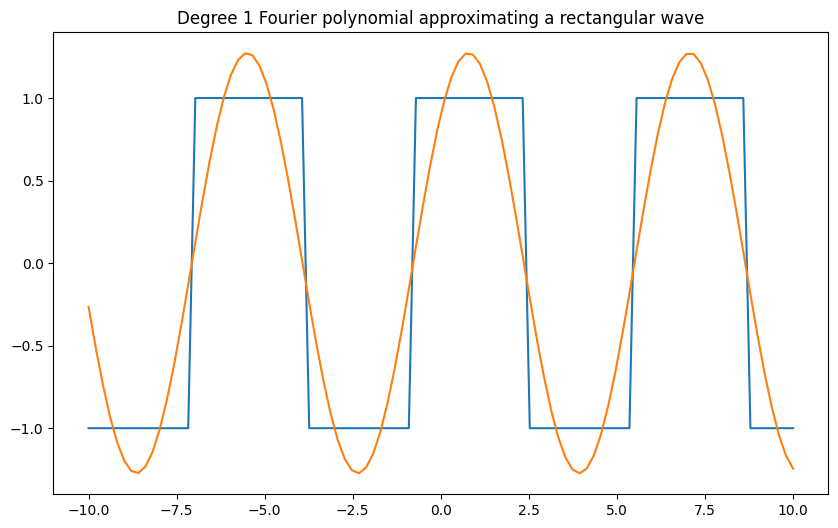

In [4]:
def squarewave(x):
    x_mod = np.mod(x,2*np.pi)
    if x_mod > 3*np.pi/4 and x_mod < 7*np.pi/4:
        return -1
    else:
        return 1
    
x = np.linspace(-10,10,100)
f = list(map(squarewave,x))
plt.figure(figsize=(10,6))
plt.plot(x,f)

def fourier(n,x):
    val = 0
    for i in np.arange(n):
        a = 2/((i+1)*np.pi)*(np.sin((i+1)*3*np.pi/4) - np.sin((i+1)*7*np.pi/4))
        b = 2/((i+1)*np.pi)*(np.cos((i+1)*7*np.pi/4) - np.cos((i+1)*3*np.pi/4))
        val += a * np.cos((i+1)*x) + b * np.sin((i+1)*x)
    return val

F1 = list(map(fourier,np.ones_like(x),x))
plt.plot(x,F1)
plt.title('Degree 1 Fourier polynomial approximating a rectangular wave');

However, when we start adding in sines and cosines with faster periods (inverse multiple of $2\pi$), we begin to "flatten out" the peaks and valleys of our estimate, getting closer to the shape of the square wave with more terms/higher degrees.

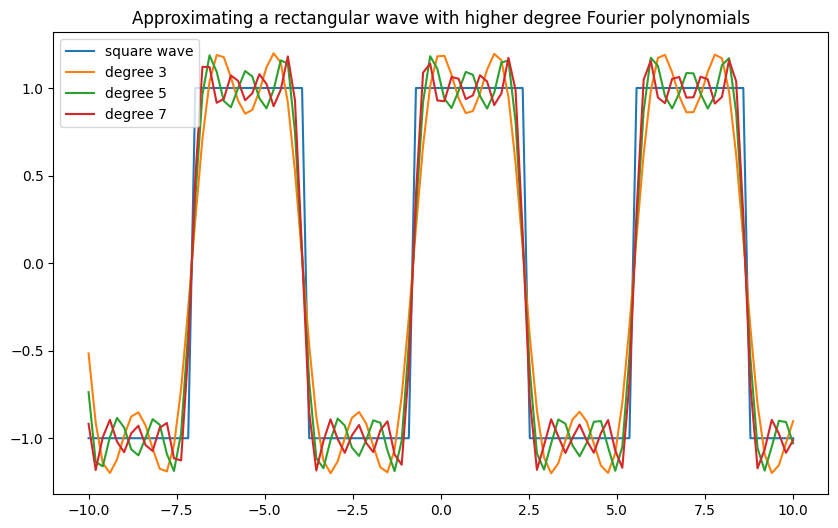

In [5]:
plt.figure(figsize=(10,6))
plt.plot(x,f)

F3 = list(map(fourier,3*np.ones_like(x),x))
plt.plot(x,F3)

F5 = list(map(fourier,5*np.ones_like(x),x))
plt.plot(x,F5)

F7 = list(map(fourier,7*np.ones_like(x),x))
plt.plot(x,F7)

plt.title('Approximating a rectangular wave with higher degree Fourier polynomials');
plt.legend(['square wave','degree 3','degree 5','degree 7'])

Looking at constituent terms of the Fourier polynomial, you can imagine how adding them together begins to resemble the rectangle wave.

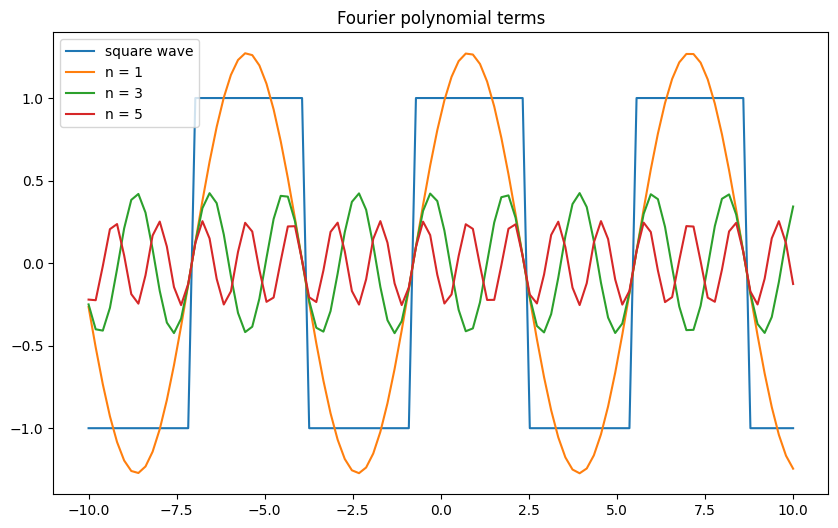

In [6]:
def fourier_term(n,x):
    i = n - 1
    a = 2/((i+1)*np.pi)*(np.sin((i+1)*3*np.pi/4) - np.sin((i+1)*7*np.pi/4))
    b = 2/((i+1)*np.pi)*(np.cos((i+1)*7*np.pi/4) - np.cos((i+1)*3*np.pi/4))
    val = a * np.cos((i+1)*x) + b * np.sin((i+1)*x)
    return val

plt.figure(figsize=(10,6))
plt.plot(x,f)

n = 1
F = list(map(fourier_term,n*np.ones_like(x),x))
plt.plot(x,F)

n = 3
F = list(map(fourier_term,n*np.ones_like(x),x))
plt.plot(x,F)

n = 5
F = list(map(fourier_term,n*np.ones_like(x),x))
plt.plot(x,F)

plt.title('Fourier polynomial terms');
plt.legend(['square wave','n = 1','n = 3','n = 5'])

### Fourier Series <a name="FourierS"></a>

Similar to Taylor polynomials to a Taylor series, the transition to a Fourier series is the same as a Fourier polynomial as the degree $n$ goes to infinity. Generalizing to an arbitrary period $2L$, the formula for a Fourier series is listed below.

<div class="alert alert-block alert-info">
<b>Fourier Series for $f$ on $[-L,L]$ (period $2L$):</b> 
$$ f_S(x) = a_0 + \sum_{n=1}^\infty\bigg( a_n \cos\bigg(\frac{n\pi x}{L}\bigg) + b_n \sin\bigg(\frac{n\pi x}{L}\bigg)\bigg)$$
with Fouier coeficients:
\begin{align}
    a_0 &= \frac{1}{2L}\int_{-L}^{L} f(x) dx \\
    a_n &= \frac{1}{L}\int_{-L}^{L} f(x) \cos\bigg(\frac{n\pi x}{L}\bigg) dx \\
    b_n &= \frac{1}{L}\int_{-L}^{L} f(x) \sin\bigg(\frac{n\pi x}{L}\bigg) dx
\end{align}
</div>

### Fourier Integrals <a name="FourierI"></a>

Fourier integral allow us to extend Fourier Series to *non-periodic* functions. This is derived from the Fourier series equations by letting the period $2L$ go to infinity to mimic a function that never repeats. By setting the integral bounds of $a_n$ and $b_n$ above to $[-\infty,\infty]$ and plugging it into the Fourier series $f_S(x)$, the equation for the Fourier integral can be shown to be:

<div class="alert alert-block alert-info">
<b>Fourier integral:</b>
$$f_I(x) = \int_0^\infty [A(w)\cos{wx} + B(w)\sin{wx}]\:dw$$
with notation:
\begin{align}
    A(w) &= \frac{1}{\pi}\int_{-\infty}^{\infty} f(v)\cos{wv} \:dv \\
    B(w) &= \frac{1}{\pi}\int_{-\infty}^{\infty} f(v) \sin{wv} \:dv
\end{align}
</div>

Similar to $a_n$ and $b_n$, $A(w)$ and $B(w)$ can be thought of as the amplitude associated with a constituent angular frequency $w$, but now defined as a continuous function of $w$ instead of discrete values (see aside).


> **Aside:** Why does the sum from the Fourier series turn into a integral? By definition, the angular frequencies of a Fourier series' consituent sines and cosines must be half-integer multiples of the base function's angular frequency, explicitly $w_n = \frac{n\pi}{L}$. So while $n$ can go to infinity, there are *discrete* frequencies that can make up the series separated by $\Delta w = \frac{\pi}{L}$, and thus an inifinite number of *discrete* terms being summed together. As $L \rightarrow \infty$, the distance between each term becomes $\Delta w \rightarrow \frac{\pi}{\infty} \rightarrow 0$; therefore, the angular frequency difference between each term becomes infinitesimally small, approaching a *continious* representation of constituent frequencies that need to be integrated over.

To see this in action, consider the Fourier series of a rectangular wave with variable period $2L > \frac{7\pi}{4}$.

\begin{equation*}
    f(x) \leftarrow 
    \begin{cases}
        0, & \text{if $-L < x < \frac{3\pi}{4}$} \\
        2, & \text{if $\frac{3\pi}{4} < x < \frac{7\pi}{4}$} \\
        0, & \text{if $\frac{7\pi}{4} < x < L$} \\
    \end{cases}
\end{equation*}

First, we'll look at individual terms of its Fourier series.

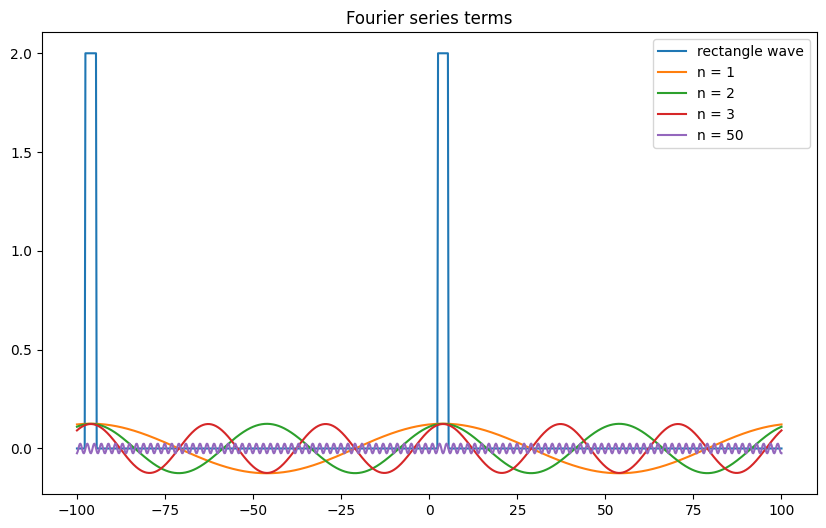

In [7]:
def squareL(L,x):
    x_mod = np.mod(x,2*L)
    if x_mod > 3*np.pi/4 and x_mod < 7*np.pi/4:
        return 2
    else:
        return 0
    
L = 50
x = np.linspace(-100,100,1000)
f = list(map(squareL,L*np.ones_like(x),x))
plt.figure(figsize=(10,6))
plt.plot(x,f)

def fourierL(L,n,x):
    val = np.pi/L
    for i in np.arange(n):
        a = 2/((i+1)*np.pi)*(np.sin((i+1)*7*np.pi**2/(4*L)) - np.sin((i+1)*3*np.pi**2/(4*L)))
        b = 2/((i+1)*np.pi)*(np.cos((i+1)*3*np.pi**2/(4*L)) - np.cos((i+1)*7*np.pi**2/(4*L)))
        val += a * np.cos((i+1)*np.pi*x/L) + b * np.sin((i+1)*np.pi*x/L)
    return val

def fourierL_term(L,n,x):
    val = np.pi/L
    i = n-1
    a = 2/((i+1)*np.pi)*(np.sin((i+1)*7*np.pi**2/(4*L)) - np.sin((i+1)*3*np.pi**2/(4*L)))
    b = 2/((i+1)*np.pi)*(np.cos((i+1)*3*np.pi**2/(4*L)) - np.cos((i+1)*7*np.pi**2/(4*L)))
    val = a * np.cos((i+1)*np.pi*x/L) + b * np.sin((i+1)*np.pi*x/L)
    return val

n = 1
F = list(map(fourierL_term,L*np.ones_like(x),n*np.ones_like(x),x))
plt.plot(x,F)

n = 2
F = list(map(fourierL_term,L*np.ones_like(x),n*np.ones_like(x),x))
plt.plot(x,F)

n = 3
F = list(map(fourierL_term,L*np.ones_like(x),n*np.ones_like(x),x))
plt.plot(x,F)

n = 50
F = list(map(fourierL_term,L*np.ones_like(x),n*np.ones_like(x),x))
plt.plot(x,F)

plt.title('Fourier series terms');
plt.legend(['rectangle wave','n = 1','n = 2','n = 3','n = 50'])

You can imagine that adding together each term will sum to a large peak at the "pulse" of the rectangle wave, while canceling out to something more flat between pulses. Indeed, this is what we observe looking at higher degrees of Fourier polynomials.

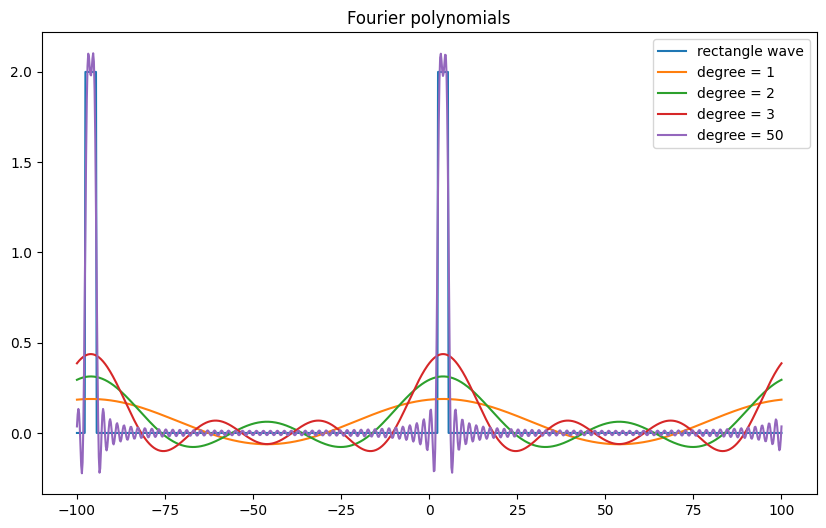

In [8]:
plt.figure(figsize=(10,6))
plt.plot(x,f)

n = 1
F = list(map(fourierL,L*np.ones_like(x),n*np.ones_like(x),x))
plt.plot(x,F)

n = 2
F = list(map(fourierL,L*np.ones_like(x),n*np.ones_like(x),x))
plt.plot(x,F)

n = 3
F = list(map(fourierL,L*np.ones_like(x),n*np.ones_like(x),x))
plt.plot(x,F)

n = 50
F = list(map(fourierL,L*np.ones_like(x),n*np.ones_like(x),x))
plt.plot(x,F)

plt.title('Fourier polynomials');
plt.legend(['rectangle wave','degree = 1','degree = 2','degree = 3','degree = 50'])

A full-fledged Fourier integral allows us to flatten out the space outside of a single pulse out to infinity. Consider a single pulse:

\begin{equation*}
    f(x) \leftarrow 
    \begin{cases}
        1, & \text{if $-1 < x < 2$} \\
        0, & \text{otherwise} \\
    \end{cases}
\end{equation*}

Since the Fourier integral is using an integral over a continuous range in frequency space, we no longer control the "degree", or number of terms, in our approximate solution. Now, we specify the "upper bound" of the integral, proportional to the "maximum frequency" to integrate over. 

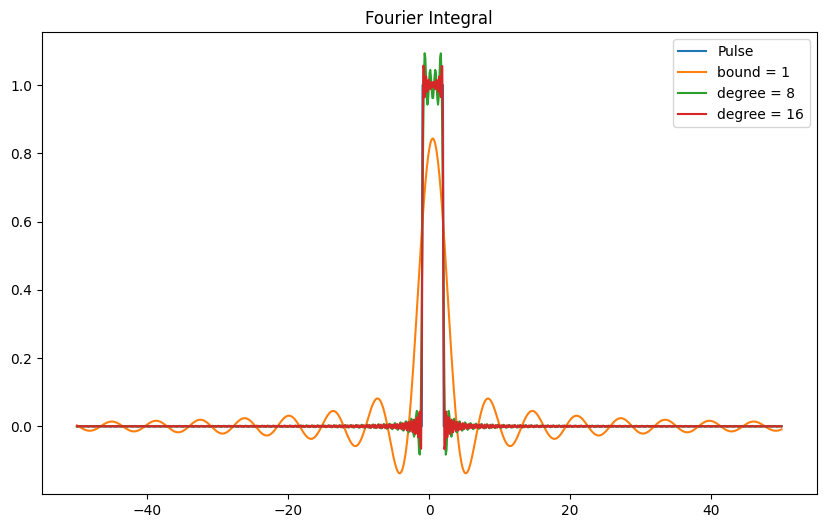

In [9]:
# we use special function Si for numerically approximating the sine integral
from scipy.special import sici as Si

def pulse(x):
    if x < 2 and x > -1:
        return 1
    else:
        return 0

x = np.linspace(-50,50,1000)
f = list(map(pulse,x))
plt.figure(figsize=(10,6))
plt.plot(x,f)

# a = upper bound of integral
def fourierint(a,x):
    return (1/np.pi) * (Si(a*(x+1))[0] - Si(a*(x-2))[0])

n = 1
F = list(map(fourierint,n*np.ones_like(x),x))
plt.plot(x,F)

n = 8
F = list(map(fourierint,n*np.ones_like(x),x))
plt.plot(x,F)

n = 16
F = list(map(fourierint,n*np.ones_like(x),x))
plt.plot(x,F)


plt.title('Fourier Integral');
plt.legend(['Pulse','bound = 1','degree = 8','degree = 16'])

### Fourier Transforms <a name="FourierT"></a>

If you followed through Fourier integrals, hopefully the step to Fourier transforms won't be too difficult. But before we jump into it, let's first define *integral transforms*.

<div class="alert alert-block alert-info">
    <b>Integral transform:</b> transformation of a function from one space (say $t$) to a function of another space (say $s$) by a process of integration that involves a kernel $k(s,t)$, following: 

$$ F(s) = \int_0^\infty k(s,t)f(t)dt $$

The kernel (or kernel function) is a function of the variables in the two spaces and defines the transformation between the two spaces.
</div>
    
Integral tranforms can be used to transform a function or data into a space that may be easier to analyze and manipulate. For example, a Fourier transform can be used to transform time series data as a fucntion of *time* into a function of *frequency*. Alongside Fourier transforms, another widely used integral transform is the **Laplace transform**, which is also useful for solving systems of differential equations, but will not be covered here.

I've already mentioned that a Fourier transform can transform a function into *frequency space*. You may have noticed already that the Fourier integral is already made up of functions in freqeuncy space, $A(w)$ and $B(w)$. Indeed, these components are the key to the Fourier transform. However, we don't want *two* functions coming out of the transformation, so we need to do a little complex algebra black magic to combine these terms into one, giving us the **complex Fourier integral**. With a flick of our magic math wand and a sprinkle of Euler's formula ($ e^{ix} = \cos{x} + i \sin{x} $), we can arrive at the Fourier transform and its inverse (e.g. going from frequency space back into the original space):

<div class="alert alert-block alert-info">
<b>Fourier Transform:</b>
$$\hat{f}(w) = \frac{1}{\sqrt{2\pi}}\int_{-\infty}^{\infty} f(x)e^{-iwx}dx$$
<b>Inverse Fourier Transform:</b>
$$f(x) = \frac{1}{\sqrt{2\pi}}\int_{-\infty}^{\infty} \hat{f}(w)e^{-iwx}dw$$
</div>

Physically, this can be interpreted as a **spectral density**, since $\hat{f}(w)$ measures the intensity of $f(x)$ in the frequency interval $[w,w+dw]$, and therefore

$$\int_{-\infty}^\infty |\hat{f}(w)|^2 dw $$

can be interpreted as the **total energy** of the system.

### Discrete Fourier Transform & Fast Fourier Transform <a name="FourierD"></a>

And now we arrive at our final destination: Discrete Fourier Transforms (DFT). A DFT is a Fourier transform for a dataset with discrete, finitely many points (i.e. equally spaced data), e.g. time series data. In other words, the DFT is like a numerical approximation of a Fourier transform. This turns our infinite integral from before into a finite sum

<div class="alert alert-block alert-info">
<b>Discrete Fourier Transform:</b> for data set with N samples
$$\hat{f}_n = \sum_{k=0}^{N-1}f_k e^{-i\frac{2\pi}{N}nk}, \;\; \;\; n = 0,...,N-1$$
with Fourier coefficient (scaled DFT):
$$c_n = \frac{\hat{f}_n}{N}$$
</div>

Since discrete time series data aren't infinite, the sum is limited by the number of samples we have. Similarly, the frequency resolution is limited by the sampling rate of the data. For a data set with $N$ samples recorded at $Fs$ Hz, the frequency spacing of DFT results are $Fs/N$ Hz. 

Although there are $N$ samples, we don't actually get $N$ different frequencies to analyze. By design, the DFT is *periodic* in $N$, meaning that DFT for frequency $n$ is equivalent to the DFT of frequency $n+N$, or $\hat{f}_n = \hat{f}_{n+N}$. Therefore, we gain nothing beyond $N-1$. Additionally, if the data set is all real-valued (which, to my knowledge, every data set you'll encounter in this program is), the DFT is *even symmetric*, meaning $\hat{f}_n = \hat{f}_{-n}$. Combining these properties of periodicity and symmetry, you'll find that the DFT is *mirrored* at $n = N/2$, meaning the *highest* frequecy we can analyze is $N/2 \times Fs/N = Fs/2$ Hz. Incidentally, this is equivalent to the *Nyquist frequency*. What this means is that only *half* of the DFT output, the first $N/2$ points, is necessary to analyze the frequency spectrum. More explicitly, you can imagine the output to be the following vector:

$$ \mathbf{\hat{f}} = [\hat{f}_0,\hat{f}_1,\hat{f}_2,...\hat{f}_{N/2},...,\hat{f}_{N-2},\hat{f}_{N-1}]$$

Accounting for periodicity, this is equivalent to:

$$ \mathbf{\hat{f}} = [\hat{f}_0,\hat{f}_1,\hat{f}_2,...\hat{f}_{N/2},...,\hat{f}_{-2},\hat{f}_{-1}]$$

and, with it being even symmetric, is equivalent to:

$$ \mathbf{\hat{f}} = [\hat{f}_0,\hat{f}_1,\hat{f}_2,...\hat{f}_{N/2},...,\hat{f}_{2},\hat{f}_{1}]$$

Therefore, for our purposes, it is sufficient to take the first $N/2$ values and double any that occur twice ($n=1$ to $n = N/2-1$) for analyses of the DFT frequency spectrum.

A **Fast Fourier Transform** is simply an efficient method of calculating the DFT. Since most languages will provide functions doing the work for you, we won't go into any further details of the FFT. 

Because of the fancy-shmancy math of the FFT, the output of FFT algorithms will usually be in the form of $\hat{f}(w)$ above (i.e. the scaling factor $\frac{1}{N}$ is dropped). Therefore, with some help from Parseval's theorem, the total energy of the DFT is:

$$ \sum_{k=0}^{N-1}|f_k|^2 = \frac{1}{N}\sum_{k=0}^{N-1}|\hat{f}_k|^2 $$